# Titanic Data Analysis

   In this project, the titanic data has been investigated through different statistical approaches. We are focusing on factors that affect the rate of survival, such as passenger boarding class, sex, age. Some interesting questions includes:
   
    1. What is survival probability for female and male passengers in different class?
    2. What is age distribution of passengers? Do children have high survival rate? 

In [85]:
# import necessary modules 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ggplot
%matplotlib inline 


In [86]:
# Load csv file to panda dataframe.

titanic_data = pd.read_csv('~/downloads/titanic-data.csv')

# Get brief idea of the date structure, print out the first few rows of the table.
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
# Database is very informative, we are able to do many research about it. The survival rate is 
# most concerned topic, so we pick a few factors to analyze their relationship with survival rate. 

# check if there is any missing values of the data
print titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


    The above result shows that there are 891 rows in the datafile. 714 'Age' data was recorded, 177 is missing. Also 2 'Embarked' data is missing. So need to clean up the date before doing analysis.

In [88]:
# calculate total number of passengers on board
print 'Total number of passengers:', len(titanic_data),'\n'

# calculate total number of female passengers and male passengers
female_passanger = titanic_data[titanic_data['Sex']=='female']
print 'Number of female passengers:', len(female_passanger), "\n"

male_passanger = titanic_data[titanic_data['Sex']=='male']
print 'Number of male passengers: ', len(male_passanger),'\n'

# calculate number of passengers in different classes
first_class = titanic_data[titanic_data['Pclass']==1]
print 'Number of first class passengers: ', len(first_class),'\n'

second_class = titanic_data[titanic_data['Pclass']==2]
print 'Number of second class passengers: ', len(second_class),'\n'

third_class = titanic_data[titanic_data['Pclass']==3]
print 'Number of third class passengers: ', len(third_class),'\n'

Total number of passengers: 891 

Number of female passengers: 314 

Number of male passengers:  577 

Number of first class passengers:  216 

Number of second class passengers:  184 

Number of third class passengers:  491 



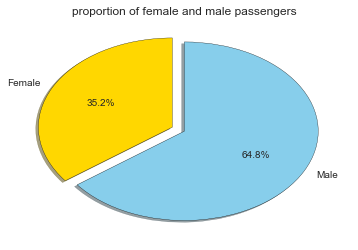

In [89]:
# Number of male passengers is almost double the number of female passengers, the pie chart 
# shows that proportion of female is 35.2%, and 64.8% for male.

passenger = [314,577]
colors = ['gold', 'skyblue']
labels= 'Female','Male'
explode = (0.1,0) 
plt.pie(passenger,labels=labels,explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('proportion of female and male passengers')

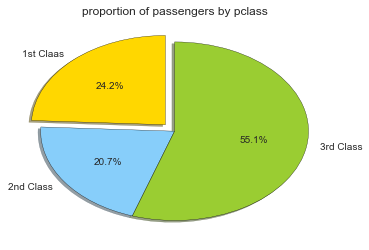

In [90]:
# Pie chart of passenger in different pclass shows more than half passengers are from third 
# class (55.1%) , and first class (24.2%) is slightly larger than second class(20.7%).

data = [216,184,491]   
colors = ['gold', 'lightskyblue','yellowgreen']
labels= '1st Claas','2nd Class','3rd Class'
explode = (0.1,0,0) 
plt.pie(data,labels=labels,explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('proportion of passengers by pclass')

### Survived passengers

In [91]:
# see the number of survived female and male
grouped_gender = titanic_data.groupby(['Survived','Sex'])
print grouped_gender.size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64


In [92]:
# how many survivors in each class
grouped_pclass = titanic_data.groupby(['Survived','Pclass'])
print grouped_pclass.size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64


In [93]:
# The calculation shows more than two third of survivors are female, and if we look at the data 
# in respect of class, passengers from 1st and 2nd class are majority.

### Consider two factors (Pclass, Sex)

In [94]:
# First, group the data in pclass and sex

grouped_data = titanic_data.groupby(['Pclass','Sex'])

print 'Total Number of passengers:'
print grouped_data.size(),'\n\n'

# calculate the number of survived passengers of each group

print 'Number of survived passengers:'
print grouped_data['Survived'].sum(),'\n\n'

# Survival probability for each pclass 

print 'Survival Probability:'
print grouped_data['Survived'].sum()/grouped_data.size()

Total Number of passengers:
Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64 


Number of survived passengers:
Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64 


Survival Probability:
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
dtype: float64


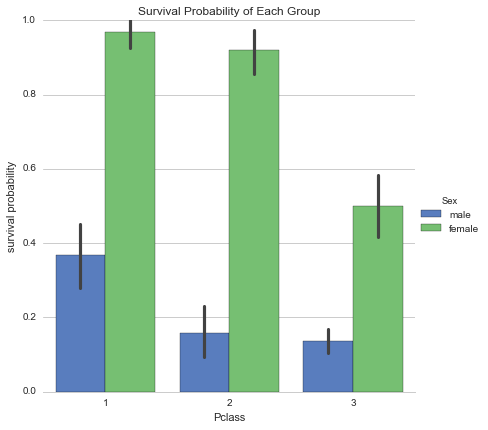

In [95]:
# Survival probability for female is significantly greater than male, more than 90% female in 
# first and second class had survived (96.8%, 92.1% in respective). Maybe it's because female 
# passengers had higher priority to take lifeboats. While survival probability for male in 
# second and third class is relatively low, only 15.7% and 13.5% in respective.

# Draw barplot to show survival for class and sex

sns.set(style="whitegrid")
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=titanic_data,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")
sns.plt.title('Survival Probability of Each Group')

### Passenger Age Distribution

In [96]:
# first, take a glance at the age distribution for all passengers.

# get complete 'Age' data, remove missing values
age_data = titanic_data['Age'].dropna()

# descriptive statistics of 'Age' data
print 'Passenger Age Descriptive Statistics:\n', age_data.describe(),'\n'

Passenger Age Descriptive Statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 



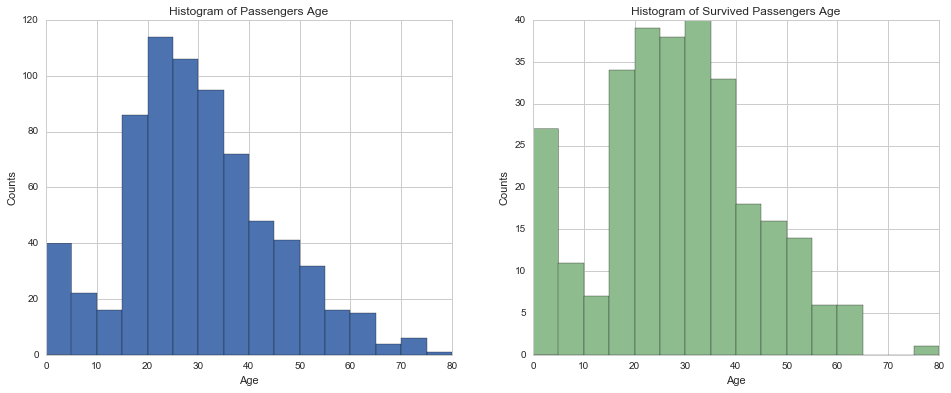

In [97]:
survived = titanic_data[titanic_data['Survived']==1]
not_survived = titanic_data[titanic_data['Survived']==0]

fig, (ax0, ax1) = plt.subplots(1, 2,figsize=[16,6])
ax0.hist(titanic_data['Age'],range=[0,80],bins=16)
ax0.set_title('Histogram of Passengers Age')

# Draw histogram of survived passengers age distribution

ax1.hist(survived['Age'],range=[0,80],bins=16,color='darkseagreen')
ax1.set_title('Histogram of Survived Passengers Age')
ax0.set_xlabel('Age')
ax0.set_ylabel('Counts')
ax1.set_xlabel('Age')
ax1.set_ylabel('Counts')
plt.show()

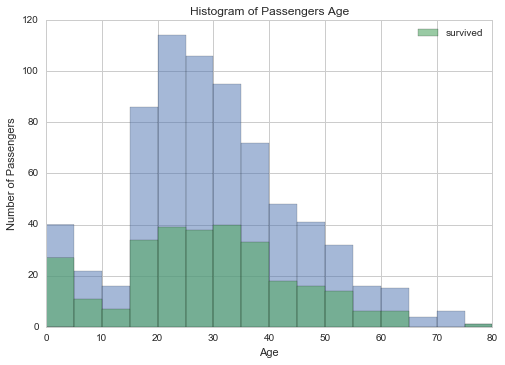

In [98]:
# From histogram, there are relatively more survivors among children who is under age of five .
# We compare the two histograms, to get an approximate proportion of survived passenger in
# each age range. 

plt.style.use('seaborn-deep')
plt.hist(titanic_data['Age'],range=[0,80],alpha=0.5,bins =16)
plt.hist(survived['Age'],range=[0,80],bins =16,alpha=0.6,label='survived')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Histogram of Passengers Age')
plt.show()

In [99]:
# Then, we'd like to evaluate the 'age' factor, will children have high priority to take lifeboat.

# the survival rate for children( passenger whose age is under 16 ).
children = titanic_data[titanic_data['Age']<16]
adult = titanic_data[titanic_data['Age']>16]
number = len(children)

print 'Number of children:', number ,'\n'

print 'Survival probability for children:',children['Survived'].sum()/float(number),'\n'

print 'Survived children in each class:\n', children.groupby(['Pclass','Survived']).size()

# result shows that survival rate for children is relatively high
# children from first and second class 

Number of children: 83 

Survival probability for children: 0.590361445783 

Survived children in each class:
Pclass  Survived
1       0            1
        1            5
2       1           19
3       0           33
        1           25
dtype: int64


Conclusion:
    In this project, we have analyzed factors of passenger class, sex and age and how they affect the survival probability. As we discussed before, female passengers, passenger from higher class and children had high survival probability, while survival rate for male from lower class is low. It is quite likely that female and children had high priority to lifeboat, and fare for first class was more expensive, which may give the passenger more chances to take the lifeboat. Or it is possible that lifeboats were close to first class cabin, and as long as boats had been occupied, passengers who were far from it will not able to have a seat.
    Limits & Improvement:
    1. factors may not have been thoroughly investigated, for example, we only consider the classes, but didn't compare the fare for each class, some second class fare may be even higher than first class, will this also affect the survival probability? And we didn't compare survival rate for different ages. 
    2. we didn't consider some other factors in the dataset, such as siblings, parents, embarked places. Will passengers travel with family have higher survival probability? Will parents and children stay together?
    3. we can built up statistic model to evaluate the weight of factors, or we can applied machine learning method to predict the result. 
    
    